# 📢 Penjelasan Isi File
---


Pada tahap ini, saya akan fokus melakukan Exploratory Data Analysis (EDA) dan Preprocessing terhadap data URL dari Website [PHISHTANK](https://phishtank.org/developer_info.php) yang diakses 24 Maret 2024

# ✅ **Conclusion**

---


- Data URL **hanya terdapat kategori Phishing**

- Data transfer protokol yang dipakai oleh URL Phishing bervariasi dari http dan https

- Tidak terdapat data yang terduplikasi

- Jumlah data dalam kategori Phishing sebanyak 54.426

- URL terpendek sekitar 14 dan terpanjang sekitar 25.523

- Sebagian besar URL Phishing menggunakan TLD 'com' dan menggunakan https

- 4 TLD teratas yang sering digunakan dalam URL Phishing adalah 'com', 'dev', 'app', dan 'network'

- 4 domain yang sering digunakan dalam URL Phishing adalah cf-ipfs, google, weeblysite, dan cloudflare-ipfs

- 2 subdomain teratas yang sering digunakan dalam URL Phishing adalah tidak ada subdomain dan 'docs'

# 🎯 **Step 0: Import library**
---

In [ ]:
!pip -q install tldextract

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tldextract

from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
plt.style.use('seaborn-v0_8')

In [ ]:
matplotlib.__version__

'3.7.1'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 🎯 **Step 1: Load dataset**
---

In [ ]:
path = '/content/drive/MyDrive/TUGAS AKHIR/Notebook/Dataset/URL/phishtank.csv'

df_url_pt = pd.read_csv(path)

df_url_pt.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8504867,https://ats-cool-site.webflow.io/,http://www.phishtank.com/phish_detail.php?phis...,2024-03-23T21:11:27+00:00,yes,2024-03-24T05:23:18+00:00,yes,Other
1,8504863,https://docs.google.com/presentation/d/e/2PACX...,http://www.phishtank.com/phish_detail.php?phis...,2024-03-23T20:51:02+00:00,yes,2024-03-24T05:23:18+00:00,yes,Other
2,8504829,https://docs.google.com/presentation/d/e/2PACX...,http://www.phishtank.com/phish_detail.php?phis...,2024-03-23T18:01:58+00:00,yes,2024-03-23T21:22:54+00:00,yes,Other
3,8504787,https://m8vqz27f.square.site/,http://www.phishtank.com/phish_detail.php?phis...,2024-03-23T17:32:34+00:00,yes,2024-03-23T21:22:54+00:00,yes,Other
4,8504743,https://docs.google.com/presentation/d/e/2PACX...,http://www.phishtank.com/phish_detail.php?phis...,2024-03-23T15:51:31+00:00,yes,2024-03-23T21:42:41+00:00,yes,Other


In [ ]:
df_url_pt.rename(columns={'url': 'URL'}, inplace=True)
df_url_pt['Category'] = 'phishing'

df_url_pt.head()

,phish_id,URL,phish_detail_url,submission_time,verified,verification_time,online,target,Category
0,8504867,https://ats-cool-site.webflow.io/,http://www.phishtank.com/phish_detail.php?phis...,2024-03-23T21:11:27+00:00,yes,2024-03-24T05:23:18+00:00,yes,Other,phishing
1,8504863,https://docs.google.com/presentation/d/e/2PACX...,http://www.phishtank.com/phish_detail.php?phis...,2024-03-23T20:51:02+00:00,yes,2024-03-24T05:23:18+00:00,yes,Other,phishing
2,8504829,https://docs.google.com/presentation/d/e/2PACX...,http://www.phishtank.com/phish_detail.php?phis...,2024-03-23T18:01:58+00:00,yes,2024-03-23T21:22:54+00:00,yes,Other,phishing
3,8504787,https://m8vqz27f.square.site/,http://www.phishtank.com/phish_detail.php?phis...,2024-03-23T17:32:34+00:00,yes,2024-03-23T21:22:54+00:00,yes,Other,phishing
4,8504743,https://docs.google.com/presentation/d/e/2PACX...,http://www.phishtank.com/phish_detail.php?phis...,2024-03-23T15:51:31+00:00,yes,2024-03-23T21:42:41+00:00,yes,Other,phishing


# 🎯 **Step 2: Check data info**
---

In [ ]:
df_url_pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54426 entries, 0 to 54425
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   phish_id           54426 non-null  int64 
 1   URL                54426 non-null  object
 2   phish_detail_url   54426 non-null  object
 3   submission_time    54426 non-null  object
 4   verified           54426 non-null  object
 5   verification_time  54426 non-null  object
 6   online             54426 non-null  object
 7   target             54426 non-null  object
 8   Category           54426 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.7+ MB


🚧 Berdasarkan informasi di atas dapat disimpulkan datasetnya tidak terdapat null values


# 🎯 **Step 3: Check duplicate data**
---

## ✨ 3.1 - Check duplicate data

In [ ]:
df_url_pt.duplicated().sum()

0

🚧 Berdasarkan informasi di atas tidak adanya data yang terduplikasi

# 🎯 **Step 4: Compare the distribution of the "Category" column.**

---



In [ ]:
url_counts = df_url_pt['Category'].value_counts(ascending=True)

url_counts

Category
phishing    54426
Name: count, dtype: int64

<ipython-input-21-6e09ab02d5d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=url_counts.index, y=url_counts.values, palette='magma')


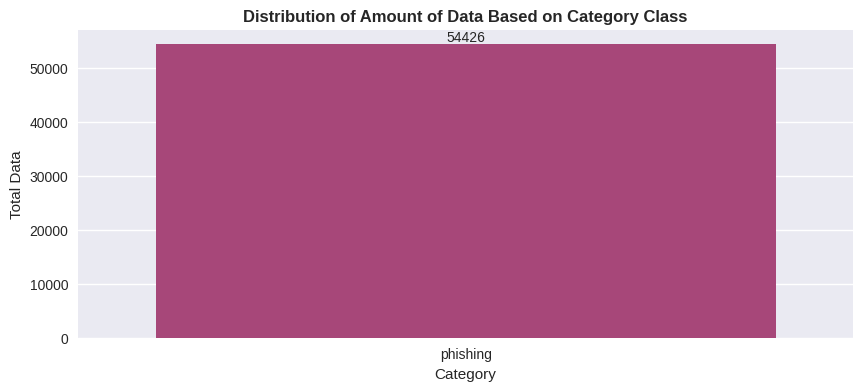

In [ ]:
plt.figure(figsize=(10, 4))

ax = sns.barplot(x=url_counts.index, y=url_counts.values, palette='magma')

for p in ax.containers:
  ax.bar_label(p,)

plt.xlabel('Category')

plt.ylabel('Total Data')

plt.title('Distribution of Amount of Data Based on Category Class', fontweight="bold")

plt.show()

# 🎯 **Step 5: Check URL length**

---

In [ ]:
df_url_pt['url_length'] = df_url_pt['URL'].apply(len)

## ✨ 5.1 - Barplot

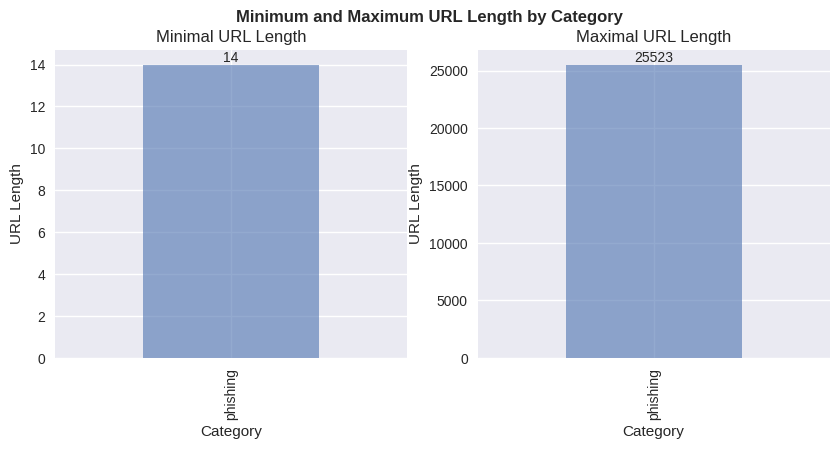

In [ ]:
def plot_text_length(df, column, label):

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    fig.suptitle('Minimum and Maximum URL Length by Category', fontweight="bold")

    df.groupby(label)[column].min().plot(kind='bar', ax=axes[0], alpha=0.6)
    axes[0].set_title('Minimal URL Length')
    axes[0].set_ylabel('URL Length')
    for p in axes[0].containers:
        axes[0].bar_label(p,)

    df.groupby(label)[column].max().plot(kind='bar', ax=axes[1], alpha=0.6)
    axes[1].set_title('Maximal URL Length')
    axes[1].set_ylabel('URL Length')
    for p in axes[1].containers:
        axes[1].bar_label(p,)

    plt.show()

plot_text_length(df_url_pt, 'url_length', 'Category')

🚧 Berdasarkan grafik di atas dapat diketahui sebagai berikut:
- URL terpendek sekitar 14
- URL terpanjang sekitar 25523

## ✨ 5.2 - Boxplot

<ipython-input-24-6afafb266021>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Category', y='url_length', data=df_url_pt, palette='rocket', whis=3.0)


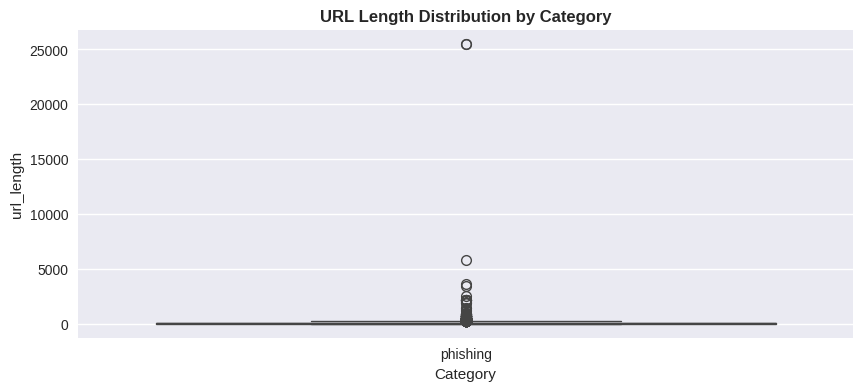

In [ ]:
plt.figure(figsize=(10, 4))

ax = sns.boxplot(x='Category', y='url_length', data=df_url_pt, palette='rocket', whis=3.0)

plt.title('URL Length Distribution by Category', fontweight="bold")

plt.show()

In [ ]:
df_url_pt.groupby('Category')['url_length'].mean()

Category
phishing    66.503234
Name: url_length, dtype: float64

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya rata-rata panjang url kategori Phishing sekitar 66. Selain itu mayoritas panjangnya melebihi dari Q3

# 🎯 **Step 6: Check the words unigram, bigram, trigrams that often appear**

---


🔎 Pada tahap ini saya menggunakan perpustakaan `CountVectorizer` dari Sklearn untuk menghitung frekuensi kemunculan kata dari unigram, bigram, dan trigram. Lalu saya filter untuk menampilkan 10 kata teratas yang paling banyak kemunculannya

🔎 Tujuan: tren popularitas dan pola perilaku dalam penggunaan URL.

In [ ]:
def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):

    vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range)

    X = vectorizer.fit_transform(corpus)

    words = vectorizer.get_feature_names_out()

    freqs = X.sum(axis=0).A1

    df = pd.DataFrame({'Data': words, 'Frequency': freqs})

    df = df.sort_values(by='Frequency', ascending=False).head(n).reset_index(drop=True)

    return df

def plot_to_graph(plot_data):

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))  # Ubah ncols menjadi 1

    for plot_info in plot_data:

        sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)

        for p in ax.patches:
            ax.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width(), p.get_y() + 0.5), ha='right', va='center', color='white')

        ax.set_title(plot_info['title'], fontweight="bold")

    plt.tight_layout()
    plt.show()

In [ ]:
df_phishing = df_url_pt[df_url_pt['Category'] == 'phishing']

## ✨ 6.1 - Unigram

In [ ]:
stop_words = None

n = 10

unigram_phishing = get_top_ngrams(df_phishing['URL'], (1, 1), stop_words, n)

unigram_phishing.head()


,Data,Frequency
0,https,49497
1,com,30476
2,ipfs,22550
3,amp,7851
4,dev,7131


<ipython-input-26-ea58213732f9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


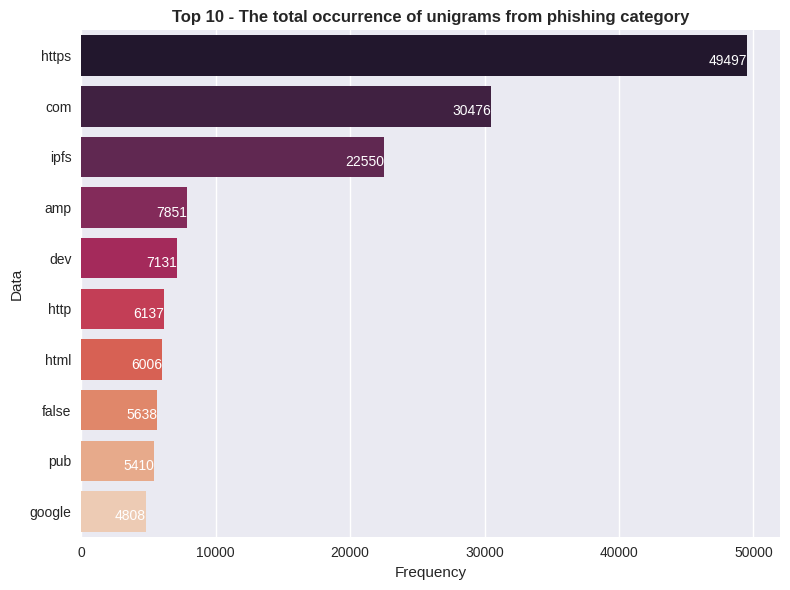

In [ ]:
plot_data = [

    {'data': unigram_phishing, 'title': 'Top 10 - The total occurrence of unigrams from phishing category'},

]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya unigram 'http', 'https' dan 'ipfs' menempati posisi 3 teratas pada kategori Phishing. Hal ini mengindikasikan kalau penyerang mayoritas menggunakan TLD untuk membuat URL Phishing dengan transfer protokol https ataupun http. Berdasarkan grafik di atas dapat diketahui bahwasanya penyerang lebih memakai https dibandingkan dengan http.

## ✨ 6.2 - Bigram

In [ ]:
stop_words = None

n = 10

bigram_phishing = get_top_ngrams(df_phishing['URL'], (2, 2), stop_words, n)

bigram_phishing.head()


,Data,Frequency
0,ipfs com,7509
1,google com,4762
2,com ipfs,4517
3,cf ipfs,4354
4,false amp,3920


<ipython-input-26-ea58213732f9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


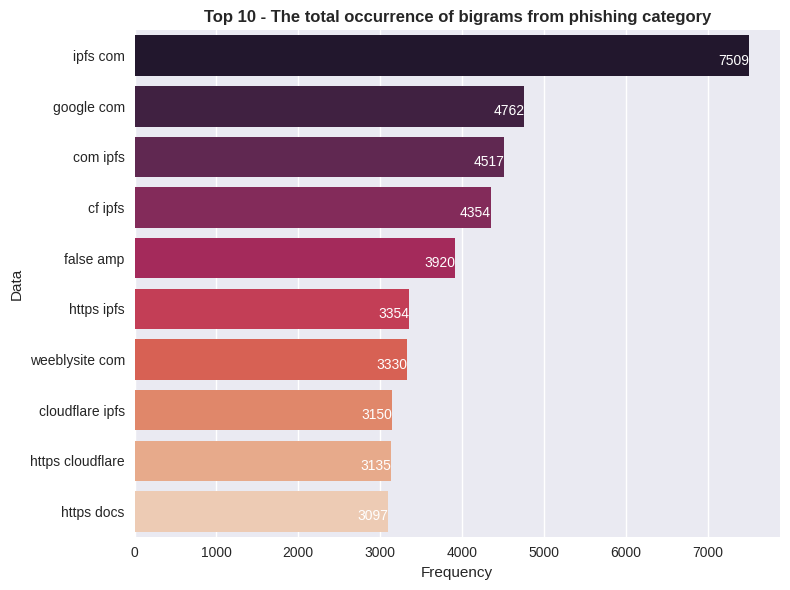

In [ ]:
plot_data = [

    {'data': bigram_phishing, 'title': 'Top 10 - The total occurrence of bigrams from phishing category'},

]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya unigram 'ipfs' banyak di beberapa bigram. Kemudian saya lihat secara lengkap url yang mengandung unigram tersebut dan didapatkan bahwa unigram tersebut tidak menjelaskan apapun.


## ✨ 6.3 - Trigram

In [ ]:
stop_words = None

n = 10

trigram_phishing = get_top_ngrams(df_phishing['URL'], (3, 3), stop_words, n)

trigram_phishing.head()


,Data,Frequency
0,ipfs com ipfs,4498
1,cf ipfs com,4354
2,cloudflare ipfs com,3150
3,https cloudflare ipfs,3132
4,docs google com,3094


<ipython-input-26-ea58213732f9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


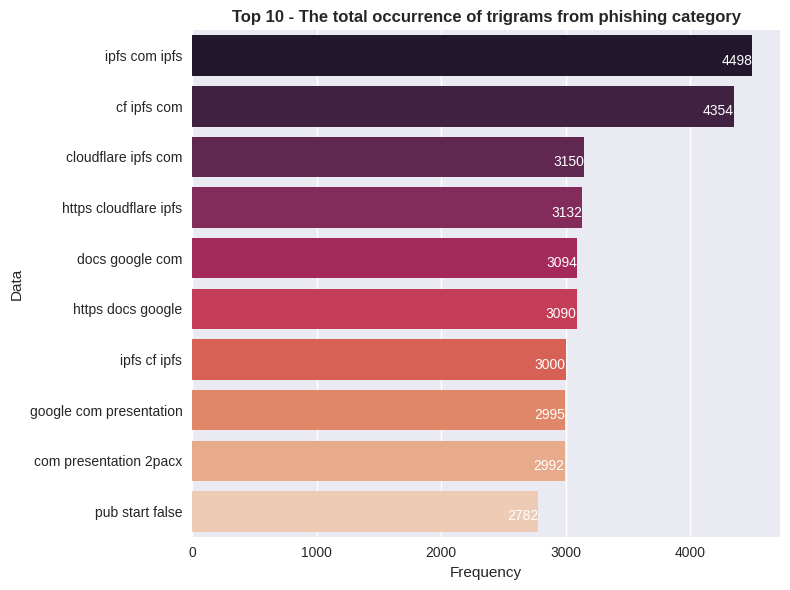

In [ ]:
plot_data = [

    {'data': trigram_phishing, 'title': 'Top 10 - The total occurrence of trigrams from phishing category'},

]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya mayoritas penyerang menggunakan unigram 'ipfs' dalam URLnya.

# 🎯 **Step 7: Extraction of sub domains, domains and top level domains**

---


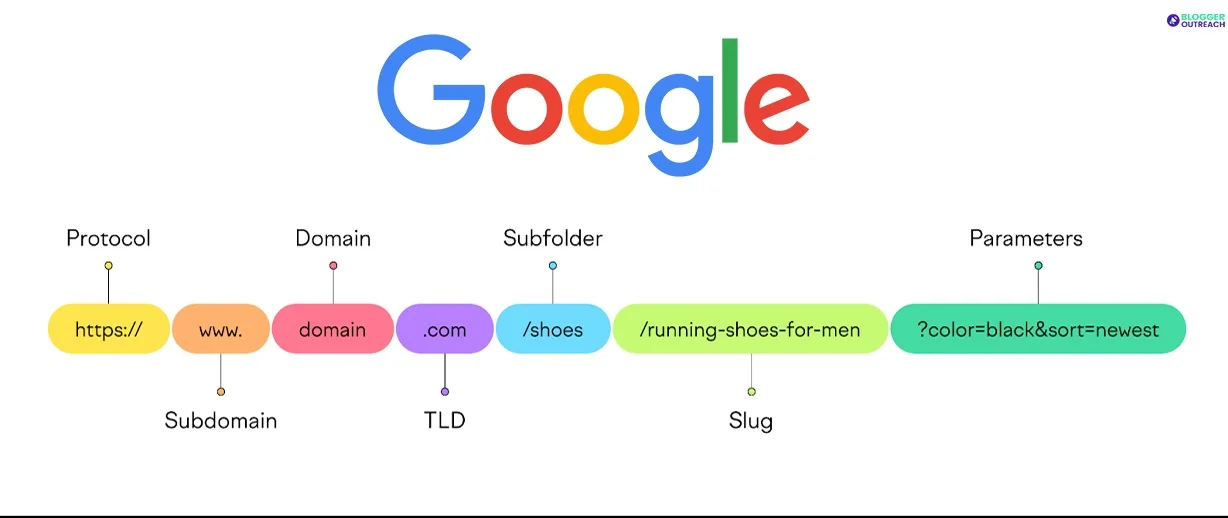

🔎 Saya melakukan ekstraksi subdomain, domain, dan TLD untuk mengetahui distribusi masing-masing dari ketiga tersebut mana yang paling digunakan untuk phishing.

In [ ]:
tld_info = df_url_pt['URL'].apply(lambda x: tldextract.extract(x))

df_url_pt['sub_domain'] = tld_info.apply(lambda x: x.subdomain)
df_url_pt['domain'] = tld_info.apply(lambda x: x.domain)
df_url_pt['tld'] = tld_info.apply(lambda x: x.suffix)

df_url_pt.head()

,phish_id,URL,phish_detail_url,submission_time,verified,verification_time,online,target,Category,url_length,sub_domain,domain,tld
0,8504867,https://ats-cool-site.webflow.io/,http://www.phishtank.com/phish_detail.php?phis...,2024-03-23T21:11:27+00:00,yes,2024-03-24T05:23:18+00:00,yes,Other,phishing,33,ats-cool-site,webflow,io
1,8504863,https://docs.google.com/presentation/d/e/2PACX...,http://www.phishtank.com/phish_detail.php?phis...,2024-03-23T20:51:02+00:00,yes,2024-03-24T05:23:18+00:00,yes,Other,phishing,175,docs,google,com
2,8504829,https://docs.google.com/presentation/d/e/2PACX...,http://www.phishtank.com/phish_detail.php?phis...,2024-03-23T18:01:58+00:00,yes,2024-03-23T21:22:54+00:00,yes,Other,phishing,175,docs,google,com
3,8504787,https://m8vqz27f.square.site/,http://www.phishtank.com/phish_detail.php?phis...,2024-03-23T17:32:34+00:00,yes,2024-03-23T21:22:54+00:00,yes,Other,phishing,29,m8vqz27f,square,site
4,8504743,https://docs.google.com/presentation/d/e/2PACX...,http://www.phishtank.com/phish_detail.php?phis...,2024-03-23T15:51:31+00:00,yes,2024-03-23T21:42:41+00:00,yes,Other,phishing,175,docs,google,com


In [ ]:
df_phishing = df_url_pt[df_url_pt['Category'] == 'phishing']

## ✨ 7.1 - Distribution top level domain

In [ ]:
tld_counts_phishing = df_phishing['tld'].value_counts().reset_index()

tld_counts_phishing.head()

,tld,count
0,com,28169
1,dev,7068
2,app,2550
3,network,2191
4,io,1913


In [ ]:
tld_counts_phishing.rename(columns={'tld': 'Data', 'count':'Frequency'}, inplace=True)

tld_counts_phishing.head()

,Data,Frequency
0,com,28169
1,dev,7068
2,app,2550
3,network,2191
4,io,1913


<ipython-input-26-ea58213732f9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


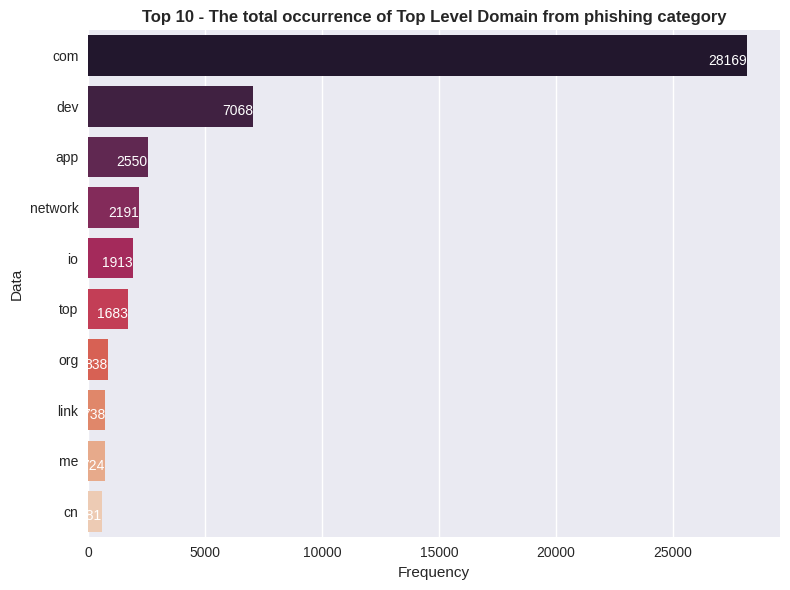

In [ ]:
plot_data = [

    {'data': tld_counts_phishing.head(10), 'title': 'Top 10 - The total occurrence of Top Level Domain from phishing category'},

]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas terdapat hal yang menarik pada kategori Phishing, penyerang ternyata mayoritas menggunakan TLD 'com'. Penggunaan domain tersebut terdapat 2 alternatif, yaitu penyerang membayar untuk menggunakan TLD tersebut atau menggunakan jasa hosting gratis yang memakai TLD 'com' di setiap url yang dihosting.

## ✨ 7.2 - Distribution domain

In [ ]:
domain_counts_phishing = df_phishing['domain'].value_counts().reset_index()

domain_counts_phishing.head()

,domain,count
0,cf-ipfs,4351
1,google,3956
2,weeblysite,3330
3,cloudflare-ipfs,3146
4,pages,2463


In [ ]:
domain_counts_phishing.rename(columns={'domain': 'Data', 'count':'Frequency'}, inplace=True)

domain_counts_phishing.head()

,Data,Frequency
0,cf-ipfs,4351
1,google,3956
2,weeblysite,3330
3,cloudflare-ipfs,3146
4,pages,2463


<ipython-input-26-ea58213732f9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


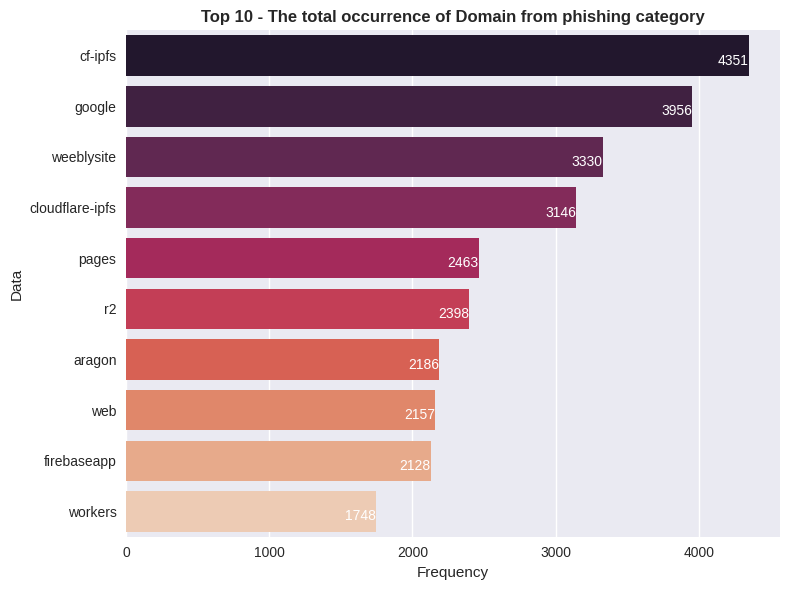

In [ ]:
plot_data = [

    {'data': domain_counts_phishing.head(10), 'title': 'Top 10 - The total occurrence of Domain from phishing category'},

]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya domain yang sering dipakai penyerang ialah cf-ipfs tetapi domain tersebut setelah saya cari tidak terdapat pada Google.

## ✨ 7.3 - Distribution subdomain

In [ ]:
subdomain_counts_phishing = df_phishing['sub_domain'].value_counts().reset_index()

subdomain_counts_phishing.head()

,sub_domain,count
0,,14270
1,docs,3094
2,ipfs.eth,2186
3,www,1513
4,new.express,927


In [ ]:
subdomain_counts_phishing.rename(columns={'sub_domain': 'Data', 'count':'Frequency'}, inplace=True)

subdomain_counts_phishing.head()

,Data,Frequency
0,,14270
1,docs,3094
2,ipfs.eth,2186
3,www,1513
4,new.express,927


<ipython-input-26-ea58213732f9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


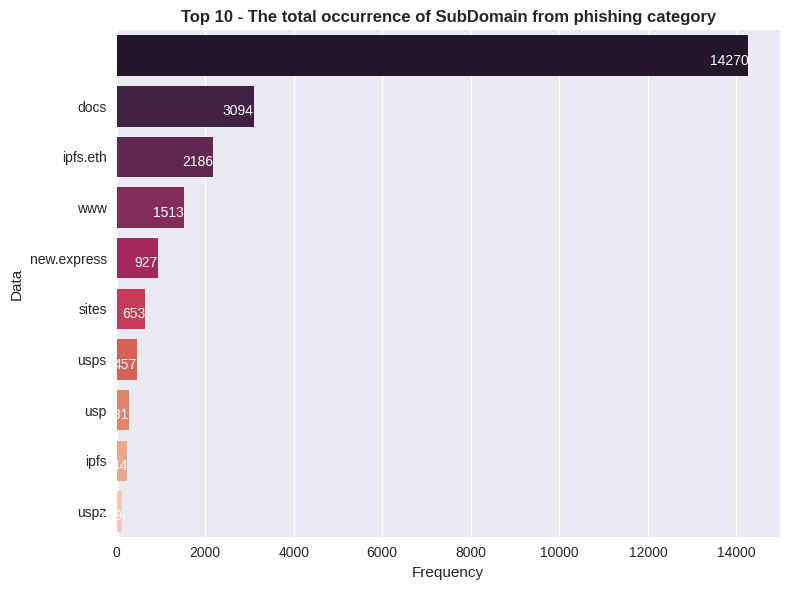

In [ ]:
plot_data = [

    {'data': subdomain_counts_phishing.head(10), 'title': 'Top 10 - The total occurrence of SubDomain from phishing category'},

]

plot_to_graph(plot_data)

🚧 Berdasar hasil grafik di atas terdapat beberapa yang tidak mempunyai subdomain yang menempati posisi teratas sehingga didapatkan informasi kalau URL Phishing mayoritas tidak memiliki sub domain.

# 🎯 **Step 8: Save data after preprocessing**

---


In [ ]:
df_url_pt.head()

,phish_id,URL,phish_detail_url,submission_time,verified,verification_time,online,target,Category,url_length,sub_domain,domain,tld
0,8504867,https://ats-cool-site.webflow.io/,http://www.phishtank.com/phish_detail.php?phis...,2024-03-23T21:11:27+00:00,yes,2024-03-24T05:23:18+00:00,yes,Other,phishing,33,ats-cool-site,webflow,io
1,8504863,https://docs.google.com/presentation/d/e/2PACX...,http://www.phishtank.com/phish_detail.php?phis...,2024-03-23T20:51:02+00:00,yes,2024-03-24T05:23:18+00:00,yes,Other,phishing,175,docs,google,com
2,8504829,https://docs.google.com/presentation/d/e/2PACX...,http://www.phishtank.com/phish_detail.php?phis...,2024-03-23T18:01:58+00:00,yes,2024-03-23T21:22:54+00:00,yes,Other,phishing,175,docs,google,com
3,8504787,https://m8vqz27f.square.site/,http://www.phishtank.com/phish_detail.php?phis...,2024-03-23T17:32:34+00:00,yes,2024-03-23T21:22:54+00:00,yes,Other,phishing,29,m8vqz27f,square,site
4,8504743,https://docs.google.com/presentation/d/e/2PACX...,http://www.phishtank.com/phish_detail.php?phis...,2024-03-23T15:51:31+00:00,yes,2024-03-23T21:42:41+00:00,yes,Other,phishing,175,docs,google,com


In [ ]:
df_url_pt = df_url_pt.head(50000)

In [ ]:
df_url_pt = df_url_pt[['URL', 'Category']]

In [ ]:
len(df_url_pt)

50000

In [ ]:
df_url_pt.to_csv('/content/drive/MyDrive/TUGAS AKHIR/Notebook/Dataset/URL/new_phishtank.csv', index=False)